# Begay home system
We will use this notebook to calculate the flow characteristics of the sink system we installed during our implementation trip in the summer of 2021.
<hr></hr>

In [1]:
import sys
sys.path.append('..')
from src import pipesys as ps
from pumps import shurflo4008 as sf

### Building the system

We first need to create a pipe system object. The arguments are the material type, the pipe diameter (we can only use a constant pipe diameter for this model), and the depth of the water in the tank, in that order.

Keep in mind that every value for this model is in SI units, so both the diameter and depth are in meters. There is a separate file with a number of unit conversion functions if you would like to use those.

In [2]:
system = ps.PipeSystem('PVC',0.0127,1) # 0.0127 meters is about 0.5 inches

Now we need to add the pipe sections, components, and pump. The arguments for <code>addSection</code> are the length of the pipe, the change in elevation of the pipe, and the component at the beginning of the pipe. <code>addPump</code> requires the position of the pump and the pump curve.

These lengths are approximations from memory and do not represent the exact pipe lengths from the Begay home.

In [3]:
system.addSection(2,0,'Entrance')
system.addSection(1.5,1.5,'90-Degree Elbow')
system.addSection(0.5,0),'90-Degree Elbow'
system.addSection(0.2,0.2,'90-Degree Elbow')

system.addPump(4,sf.pcurve)


Now, we can solve the system for its velocity and pressure. That is done with one command.

In [4]:
system.solve()

### Plots
There are a variety of plot functions in <code>ps.PipeSystem</code>. Here are a few.

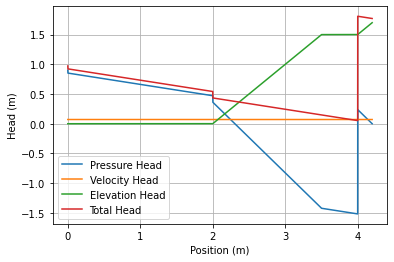

In [5]:
system.plotAllHead()

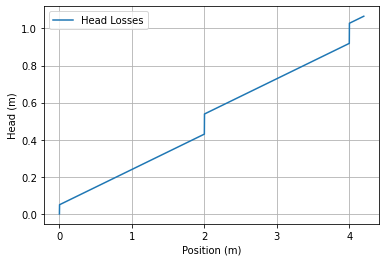

In [6]:
system.plotLosses()

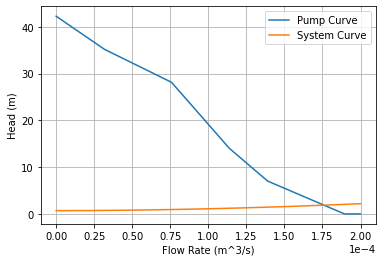

In [7]:
system.plotCurves()